# Yelp "Business" Dataset - Are Reviews Biased Across State Lines?

In this analysis I delve into a dataset published by Yelp containing review information for over 150,000 businesses.

As an active Yelp user, I rely heavily on reviews when choosing which businesses to patronize, particularly when I am traveling and less familiar with the territory. I am also a frequent Yelp reviewer, though I sometimes wonder whether I have natural biases that may skew the data. Ultimately, individual biases should not be an issue for Yelp as long as: 1.) they are randomly distributed and 2.) there is a sufficient number of reviews to smooth variation.

I'm interested in testing (1), specifically the question of whether there are cultural tendencies based on geography that may bias reviews in a non-random way, due to my personal anecdotal experience with Uber's peer-based review system. Years ago, I moved from New York to California, and I noticed that my Uber passenger rating rose materially in the months following my move. Since my behavior as an Uber passenger didn't change, I hypothesize that the increase in my rating is due to "nicer" Californian Uber drivers giving me higher ratings for the same passenger behavior.

If the same cultural tendencies were to apply to Yelp reviews, it could be misleading for users traveling across state lines, who may be unaware of rating "inflation" or "deflation" and make decisions based on skewed data.

Source: https://www.yelp.com/dataset

I start by importing the dataset and inspecting some key information. It looks like there is a unique key "business_id" for each business as well as a range of descriptive data such as location information (city, state, etc) and review information (stars, review_count, etc).

For the majority of these categories, there are no null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


Let's begin by looking at descriptive statistics for the 'stars' data. Yelp allows users to rate businesses on a scale of 1-5 stars, with 5 being the best rating.

With a mean (3.6) that is higher than the midpoint of the range of available ratings (3.0), it seems that the ratings data is skewed towards better ratings. This matches my intuition that users are more likely to be "nice" rather than critical in their reviews. 

In [2]:
df.stars.describe()

count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

Viewing the stars data in graphical form corroborates the skew towards higher ratings - 4 stars is the most common rating and 1 star is the least. 

There is a clear propensity towards ratings of 3 or higher vs lower than 3.

Given the limited range of accepted values, there are no material outliers.

<AxesSubplot:xlabel='stars', ylabel='count'>

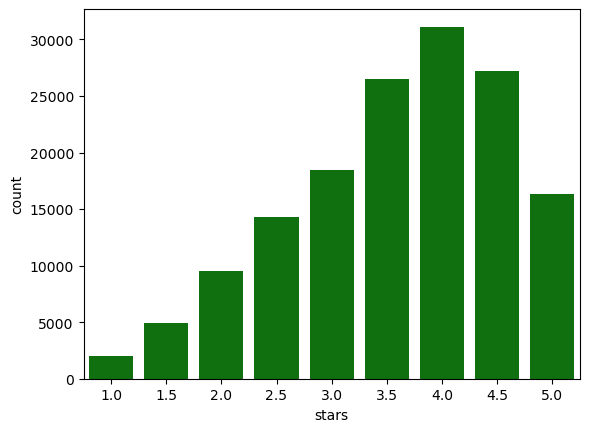

In [3]:
sns.countplot(x=df.stars, color='green')

I'm curious to see if average ratings differ between states, as rating skews across state lines might be confusing or misleading to users who are traveling outside of their home state (where they are familiar with the rating scale).

To start, let's examine the breakdown of data by 'State'. It looks like there are some states with a lot of data (2000+ entries) and some with relatively few (4 or lower).

In [4]:
states_value_counts = df.state.value_counts()
states_value_counts

PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: state, dtype: int64

I remove the rows with insufficient data to draw significant insights

In [5]:
to_remove = states_value_counts[states_value_counts < 10].index
df_states = df[~df.state.isin(to_remove)]
df_states.state.value_counts()

PA    34039
FL    26330
TN    12056
IN    11247
MO    10913
LA     9924
AZ     9912
NJ     8536
NV     7715
AB     5573
CA     5203
ID     4467
DE     2265
IL     2145
Name: state, dtype: int64

Now that we have eliminated the states with minimal data, let's examine how the average stars differs by state.

At first glance, all the means look pretty similar - the range is only ~0.6 stars, and all averages have a "3-handle".

state
AB    3.447515
AZ    3.592010
CA    3.996733
DE    3.354967
FL    3.610957
ID    3.707634
IL    3.369697
IN    3.588246
LA    3.679162
MO    3.546092
NJ    3.459114
NV    3.736876
PA    3.573019
TN    3.571500
Name: stars, dtype: float64


count    14.000000
mean      3.588109
std       0.164773
min       3.354967
25%       3.480859
50%       3.580632
75%       3.662110
max       3.996733
Name: stars, dtype: float64

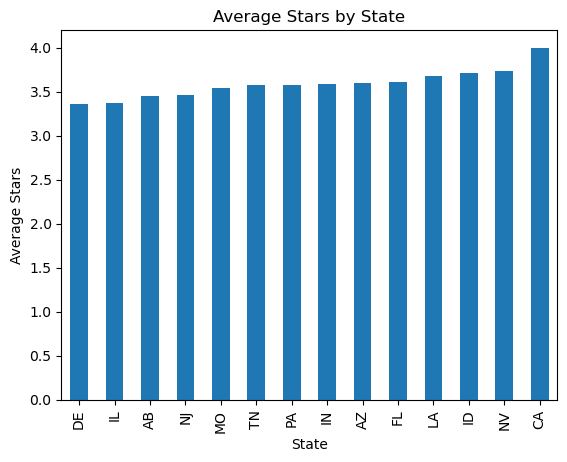

In [6]:
mean_stars_by_state = df_states.groupby(['state'])['stars'].mean()
print(mean_stars_by_state)
mean_stars_by_state.sort_values().plot(kind='bar', xlabel = 'State', ylabel='Average Stars', title = 'Average Stars by State')
mean_stars_by_state.describe()

While the averages seem similar, are they mathematically the same? 

To answer this question, I test to see if the means for CA and DE (highest and lowest values) are statistically different.

Null Hypothesis: CA_mean = DE_mean

Alternate Hypothesis: CA_mean != DE_mean

Significance Value = 1.96 (P-value 2.5%)

We easily reject the null hypothesis with a Z-Score of 26.32. While the values at first glance look similar, given the large quantity of data they are still statistically different.

In [7]:
df_CA = df_states[df_states.state=='CA']
df_DE = df_states[df_states.state=='DE']

CA_mean = df_CA.stars.mean()
CA_stdev = df_CA.stars.std()
CA_count = df_CA.stars.count()
DE_mean = df_DE.stars.mean()
DE_stdev = df_DE.stars.std()
DE_count = df_DE.stars.count()

z_CA_DE = (CA_mean - DE_mean) / (CA_stdev**2/CA_count + DE_stdev**2/DE_count)**0.5
print('Z-Score: '+str(round(z_CA_DE, 2)))



Z-Score: 26.32


Since CA_mean and DE_mean were so clearly different, let's test NV_mean vs CA_mean since NV was the closest to CA. If these two means are statistically different, we can say with even more confidence that the average ratings between states are not the same.

Null Hypothesis: CA_mean = NV_mean

Alternate Hypothesis: CA_mean != NV_mean

Significance Value = 1.96 (P-value 2.5%)

Once again, we easily reject the null hypothesis with a Z-Score of 15.55. Even the top two values are statistically different.

Thus we can conclude that Californian businesses are either higher quality than those in other states, or alternately reviewers in California are "nicer"

In [8]:
df_NV = df_states[df_states.state=='NV']

NV_mean = df_NV.stars.mean()
NV_stdev = df_NV.stars.std()
NV_count = df_NV.stars.count()

z_CA_NV = (CA_mean - NV_mean) / (CA_stdev**2/CA_count + NV_stdev**2/NV_count)**0.5
print('Z-Score: '+str(round(z_CA_NV, 2)))

Z-Score: 15.55


In conclusion, average ratings between states are statistically different in some cases (we could test further combinations to determine whether they are different in all cases). 

Possible drivers for this:
- Reviewers within certain states are "nicer" than others - for example, reviewers in California (the state with the highest average rating) may be culturally biased towards higher ratings
- Businesses in certain states are simply higher quality and therefore deserve higher ratings
- A combination of these factors

The differentiation in average ratings between states may be confusing for users who are traveling outside of their home state, particularly if the driver of this differentiation is the first bullet above. For example, if a 5-star review is more common in California than in Delaware, a user traveling from Delaware to California may be misled by an "inflated" 5-star review, which they would view as a stronger indicator given its relative rarity in the user's home state.

Yelp may consider introducing a normalization feature whereby a user can input their home state, and ratings for businesses other states are automatically scaled to the average for the home state. Using the Delaware / California example again, a user traveling from Delaware to California would see Californian ratings adjusted downward to account for the relatively higher scores in California vs Delaware.

For further investigation, we could look at specific users from various states and analyze whether their ratings for businesses out of their home state are statistically higher than the average rating for those businesses by users in the business's home state. This could isolate the "niceness" factor and test whether the first bullet above is the driver for the differentiation in average rating between states.
